# Data analysis and wrangling

## Dependencies

In [1]:
"""
Fetch and analysis the following datasets:
    - MIMIC-3 from the server in COMP-WELL lab
    - Adult Census dataset from Fairlearn
    - Intersectional bias assessment for depression prediction from OpenML

docs for fetch_openml: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html 
"""

from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
PLOTS_PATH ="./plots/"
DATA = {}
ACS_INCOME = "ACSincome"
IBADepression = "IBADepression"
RAC1P_MAP = {
    1.0: "White alone",
    2.0: "Black or African American alone",
    3.0: "American Indian alone",
    4.0: "Alaska Native alone",
    5.0: "American Indian and Alaska native tribes specified",
    6.0: "Asian alone",
    7.0: "Native Hawaiian and Other Pacific Islander alone",
    8.0: "Some Other Race alone",
    9.0: "Two or More races"
}
SEX_MAP = {
    1.0: "Male",
    2.0: "Female"
}

## Fetching data from OpenML

In [3]:
def fetch_openml_dataset(choice):
    """Load dataset according to the choice from OpenML.
    
    Args:
        choice (str): dataset name
    
    Returns:
        X (pd.Dataframe): features
        y_true (pd.Series): true labels
    """
    if choice == ACS_INCOME:
        data = fetch_openml(data_id=43141, as_frame=True, parser='auto')
    elif choice == IBADepression:
        data = fetch_openml(data_id=45040, as_frame=True, parser='auto')

    X = pd.get_dummies(data.data)
    y_true = data.target
    return X, y_true

In [4]:
def test_fetch_openml_dataset():
    """Test fetch_openml_dataset function."""
    DATA[ACS_INCOME] = fetch_openml_dataset(ACS_INCOME)
    DATA[IBADepression] = fetch_openml_dataset(IBADepression)


test_fetch_openml_dataset()

## Data analysis

- Unbalance in the data
    - `plot_val_counts()`
- Correlated features
- Mislabelling due to discrimination (difficult to detect, so we skip it for now)

In [5]:
def plot_val_counts(df, col_name, xmapping, xlabel, ylabel, title, save_path=None):
    """Plot bar chart visualizing the value counts of a column in the dataframe.
    
    Args:
        df (pd.Dataframe): dataframe
        col_name (str): column name
        xmapping (dict): mapping from the value to the label
        xlabel (str): x-axis label
        ylabel (str): y-axis label
        title (str): title of the plot
        save_path (str): path to save the plot
        
    Returns:
        fig (matplotlib.figure.Figure): figure
    """
    fig, ax = plt.subplots()
    val_counts_series = df[col_name].value_counts().rename(xmapping)
    keys = list(val_counts_series.keys())
    vals = list(val_counts_series.values)
    ax.bar(keys, vals)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(keys)
    ax.set_xticklabels(keys, rotation=45, ha='right')
    if save_path:
        fig.savefig(save_path + title + ".png", bbox_inches='tight')
    return fig

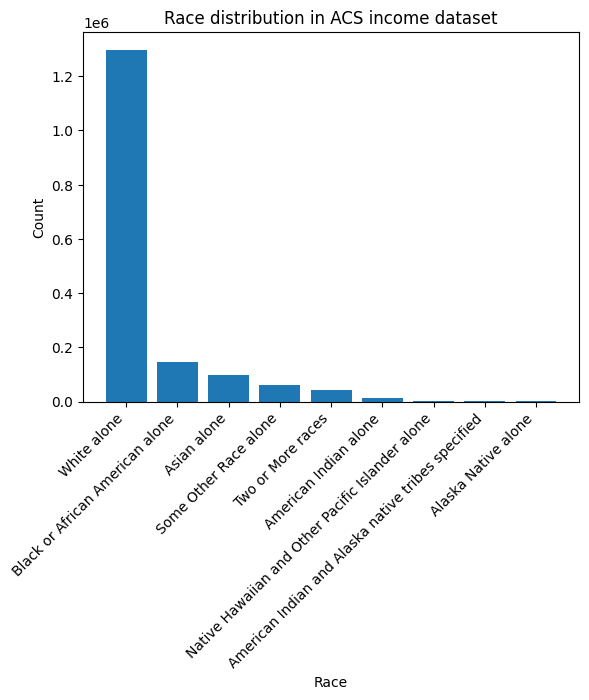

In [6]:
def test_plot_val_counts():
    """Test plot_val_counts function."""
    plot_val_counts(DATA[ACS_INCOME][0], 'RAC1P', RAC1P_MAP, 'Race', 'Count',
                    'Race distribution in ACS income dataset', PLOTS_PATH)
    # plot_val_counts(DATA[ACS_INCOME][0], 'SEX', SEX_MAP, 'Sex', 'Count',
    #                 'Sex distribution in ACS income dataset', PLOTS_PATH)


test_plot_val_counts()

In [7]:
def plot_income_distribution(target, xlabel, ylabel, title, save_path=None):
    """Plot income distribution in ACS income dataset.
    
    Args:
        target (pd.Series): series
        xlabel (str): x-axis label
        ylabel (str): y-axis label
        title (str): title of the plot
    """
    print(target.describe())
    fig, ax = plt.subplots()
    ax.hist(target, bins=50)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    if save_path:
        fig.savefig(save_path + title + ".png", bbox_inches='tight')
    return fig

count    1.664500e+06
mean     5.666386e+04
std      7.306745e+04
min      1.040000e+02
25%      2.000000e+04
50%      3.900000e+04
75%      6.800000e+04
max      1.423000e+06
Name: PINCP, dtype: float64


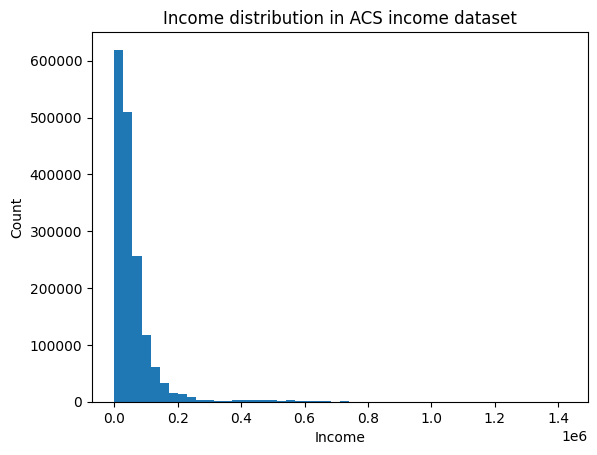

In [8]:
def test_plot_income_distribution():
    """Test plot_income_distribution function."""
    plot_income_distribution(DATA[ACS_INCOME][1], 'Income', 'Count',
                             'Income distribution in ACS income dataset', PLOTS_PATH)
    

test_plot_income_distribution()

## Evaluating fairness-related metrics

Choose sensitive features and assess the fairness of preditions. 